In [1]:
#————————————————————#
#  Import Packages   #
#————————————————————#

import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#———————————————————————#
#Create the Muon Decay  #
#Simulation Class       #
#———————————————————————#
class MCMuDecay(object):

    #—————————————————————————————————————————————————————————
    #Class constructor, the time range is 0 to 10 microseconds
    #—————————————————————————————————————————————————————————
    def __init__(self, T_range):
        self.low_T_range = T_range[0]
        self.high_T_range = T_range[1]
        self.sample_size = 1000
        self.mu_lifetime = 2.2 #This is the true muon lifetime (in microseconds)

    #—————————————————————————————————————————————————————————
    #The exponential Distribution that describes the muon decay
    #—————————————————————————————————————————————————————————
    def mu_exp(self, t):
        return ( (1/self.mu_lifetime)*np.exp(-t/self.mu_lifetime) )

    #—————————————————————————————————————————————————————————
    #Function returning single random generated exponential muon
    #decay time
    #—————————————————————————————————————————————————————————
    def mu_random_single_lt(self):
        return ( np.random.exponential(scale=self.mu_lifetime) )
    
    #—————————————————————————————————————————————————————————
    #Function which gives an array of randomized mu decay times
    #—————————————————————————————————————————————————————————
    def mu_sample_decayT(self):
        #first create an empty np array 
        mu_sample_decayT_list = []
        #while loop making sure to run until the list has 1000 entries
        while len(mu_sample_decayT_list)<self.sample_size:
            single_random_mu_lt = self.mu_random_single_lt()
            #compare the random generated decay time is within the range
            if (single_random_mu_lt>self.low_T_range) and (single_random_mu_lt<self.high_T_range):
                mu_sample_decayT_list.append(single_random_mu_lt)
        #convert the list into a np array
        mu_sample_decayT_array = np.array(mu_sample_decayT_list)
        return mu_sample_decayT_array

    #—————————————————————————————————————————————————————————————————
    #Function that estimates the lifetime of the simulated muon sample,
    #which is the average of all measured decay time
    #—————————————————————————————————————————————————————————————————
    def est_sim_mu_lifetime(self):
        return self.mu_sample_decayT().mean()

    #—————————————————————————————————————————————————————————
    #Function that calculates multiple sets of muon lifetimes
    #—————————————————————————————————————————————————————————
    def mu_multi_sample_decayT(self):
        repeated_mu_est_tau = [self.est_sim_mu_lifetime() for _ in range(500)]
        return np.array(repeated_mu_est_tau)
        


In [3]:
#———————————————————————#
# Main function used to #
# run the class and     #
# produce relevant      #
# results.              #
#———————————————————————#

def main():
    #Define the relevant parameters
    T = np.linspace(0, 10, num=1000)
    T_range = [0, 10]

    #Initialize the class
    MCMuSim = MCMuDecay(T_range)

    #from the class, obtain the simulated sample of 1000 muon decay lifetime
    mu_sim_decay_sample = MCMuSim.mu_sample_decayT()

    #From the class, obtain the estimated muon lifetime for the simulated muon dataset
    mu_sim_est_lifetime = MCMuSim.est_sim_mu_lifetime()
    
    #Plot histogram to check the simulated 1000 muon decays and also plot the predicted true muon decay time
    plt.hist(mu_sim_decay_sample, density=True, bins=25, label="Simulated Sample Distribution")
    plt.plot(T, MCMuSim.mu_exp(T), label="Predicted True Distribution")
    plt.xlabel("Muon Life Time ($\mu s$)")
    plt.ylabel("Probability")
    plt.title("Distribution of Muon Sample Lifetimes")
    plt.axvline(2.2, 0, color="r", linestyle="dashed", label="True Muon Lifetime")
    plt.axvline(mu_sim_est_lifetime, 0, color="g", linestyle="dashed", label="Estimated Muon Lifetime" )
    plt.legend()
    plt.show()

    #plot histo for the estimated muon lifetime across 500 repeated experiments
    dataset = MCMuSim.mu_multi_sample_decayT()
    plt.hist(dataset, bins=25, label="")
    plt.xlabel("Muon Life Time ($\mu s$)")
    plt.ylabel("Number of Events")
    plt.title("Distribution of Mean Muon Sample Lifetimes Over 500 Repeated Experiment")
    plt.axvline(dataset.mean(), 0, color="g", linestyle="dashed", label="Simulated Mean Lifetime")
    plt.axvline(2.2, 0, color="r", linestyle="dashed", label="True Muon Lifetime")
    plt.legend()

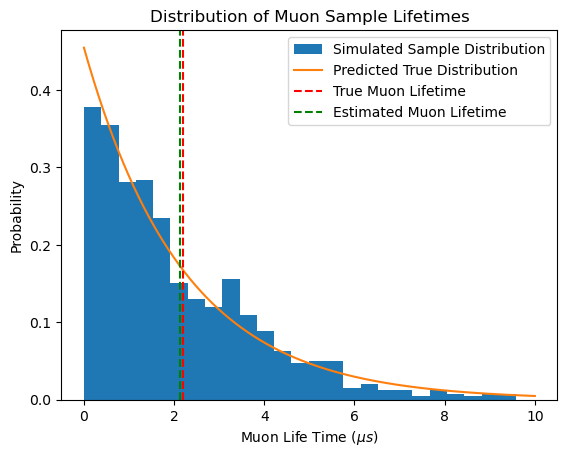

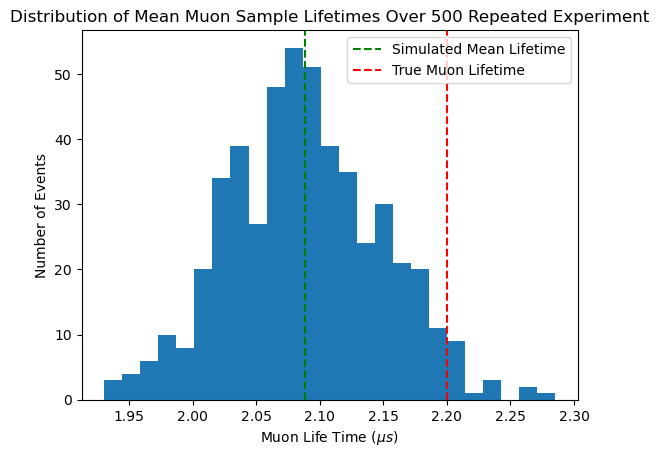

In [4]:
main()

### Result Discussion

*Precision of the Estimated Lifetime from any Single Experiment*

For any single experiment with 1000 generated muons, the precision of the estimated muon lifetime is limited by the standard error on the mean, which is equal to $\frac{\sigma}{\sqrt{N}}$. Where N is the number of samples used for the computation of the mean. From this, it shows that the precision depends on the number of random samples taken from the exponential distribution.

*Bias*

Looking at the lifetime distribution of our sample of 1000 generated muon, notice that the range of the lifetime is within the finite range of $[0,10]$. This results in a less count of the muon lifetimes when sampling randomly from the defined exponential distribution. And this is the main source of the bias in the simulation. 
 
By increasing the upper bound of the limit used to sample the muon lifetimes, the systematic error in the bias reduces and the distribution gets closer to the true muon lifetime. Oppositely, the reduction on the limit increases our bias and increases the systematic uncertainty.